# A. Data Preprocessing

LIBRARY

In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, accuracy_score

load dataset tanpa menentukan usecols dulu

In [4]:
# load dataset tanpa menentukan usecols dulu
df = pd.read_csv('restaurant_customer_satisfaction.csv')

# Tampilkan informasi kolom yang tersedia
print("Kolom yang tersedia dalam dataset:")
print(df.columns.tolist())

Kolom yang tersedia dalam dataset:
['CustomerID', 'Age', 'Gender', 'Income', 'VisitFrequency', 'AverageSpend', 'PreferredCuisine', 'TimeOfVisit', 'GroupSize', 'DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating', 'HighSatisfaction']


Baca dataset dengan kolom yang sesuai

In [30]:
df = pd.read_csv('restaurant_customer_satisfaction.csv',usecols=['CustomerID', 'Age', 'Gender', 'Income', 'VisitFrequency', 'AverageSpend', 'PreferredCuisine', 'TimeOfVisit', 'GroupSize', 'DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating', 'HighSatisfaction'])

--PENJELASAN SETIAP KOLOM:

    1.CustomerID =ID unik untuk mengidentifikasi setiap pelanggan
    2.Age = Usia pelanggan dalam tahun
    3.Gender= Jenis kelamin pelanggan
    4.Income=Pendapatan pelanggan
    5.VisitFrequency= Seberapa sering pelanggan mengunjungi restoran
    6.AverageSpend = Rata-rata pengeluaran pelanggan setiap kali berkunjung
    7.PreferredCuisine= Jenis masakan yang disukai pelanggan
    8.TimeOfVisit= Waktu kunjungan pelanggan 
    9.GroupSize=Jumlah orang dalam kelompok saat berkunjung
    10.DiningOccasion = Ocasion atau alasan kunjungan 
    11.MealType= Jenis makanan yang dipesan 
    12.OnlineReservation= Apakah pelanggan melakukan reservasi online
    13.DeliveryOrder= Apakah pelanggan memesan untuk pengantaran
    14.LoyaltyProgramMember = Status keanggotaan program loyalitas pelanggan
    15.WaitTime = Waktu tunggu pelanggan sebelum dilayani
    16.ServiceRating = Penilaian pelanggan terhadap layanan
    17.FoodRating= Penilaian pelanggan terhadap makanan
    18.AmbianceRating= Penilaian pelanggan terhadap suasana restoran
    19.HighSatisfaction =Indikator kepuasan pelanggan secara keseluruhan




Periksa missing values


In [32]:
#Tidak ada missing values dalam dataset
print("Missing values dalam dataset:")
print(df.isnull().sum())

Missing values dalam dataset:
CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64


 Encoding variabel kategorikal

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = ['Gender', 'VisitFrequency', 'PreferredCuisine', 
                   'TimeOfVisit', 'DiningOccasion', 'MealType',
                   'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

Normalisasi data numerik

In [35]:
scaler = StandardScaler()
numeric_cols = ['Age', 'Income', 'AverageSpend', 'GroupSize', 'WaitTime',
                'ServiceRating', 'FoodRating', 'AmbianceRating']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Periksa hasil transformasi
print("\nSampel data setelah transformasi:")
print(df.head())


Sampel data setelah transformasi:
   CustomerID       Age  Gender    Income  VisitFrequency  AverageSpend  \
0         654 -0.590289       1 -0.066593               3     -1.486313   
1         655 -1.659653       1 -1.108162               2      0.186188   
2         656 -0.189277       0 -0.057241               3      0.019761   
3         657 -0.055607       1  0.284150               2     -1.186885   
4         658  0.746416       0 -0.471175               1      0.810200   

   PreferredCuisine  TimeOfVisit  GroupSize  DiningOccasion  MealType  \
0                 1            0  -0.795670               0         1   
1                 0            1  -1.577528               1         0   
2                 0            1   0.377116               2         0   
3                 2            2  -1.577528               2         0   
4                 1            0  -1.577528               0         1   

   OnlineReservation  DeliveryOrder  LoyaltyProgramMember  WaitTime  \
0   

# B.	Eksplorasi Data

Statistik deskriptif

In [36]:
#Statistik deskriptif
print("Statistik deskriptif:")
print(df.describe())

Statistik deskriptif:
        CustomerID           Age       Gender        Income  VisitFrequency  \
count  1500.000000  1.500000e+03  1500.000000  1.500000e+03     1500.000000   
mean   1403.500000 -4.736952e-17     0.494000  1.421085e-17        1.914667   
std     433.157015  1.000334e+00     0.500131  1.000334e+00        1.044404   
min     654.000000 -1.726488e+00     0.000000 -1.726731e+00        0.000000   
25%    1028.750000 -8.075033e-01     0.000000 -8.770660e-01        1.000000   
50%    1403.500000  1.122832e-02     0.000000 -2.905137e-03        2.000000   
75%    1778.250000  8.800864e-01     1.000000  8.707645e-01        3.000000   
max    2153.000000  1.682109e+00     1.000000  1.675467e+00        3.000000   

       AverageSpend  PreferredCuisine  TimeOfVisit     GroupSize  \
count  1.500000e+03       1500.000000  1500.000000  1.500000e+03   
mean   1.894781e-16          2.048667     0.997333  1.456613e-16   
std    1.000334e+00          1.392692     0.820025  1.000334e+

Visualisasi distribusi

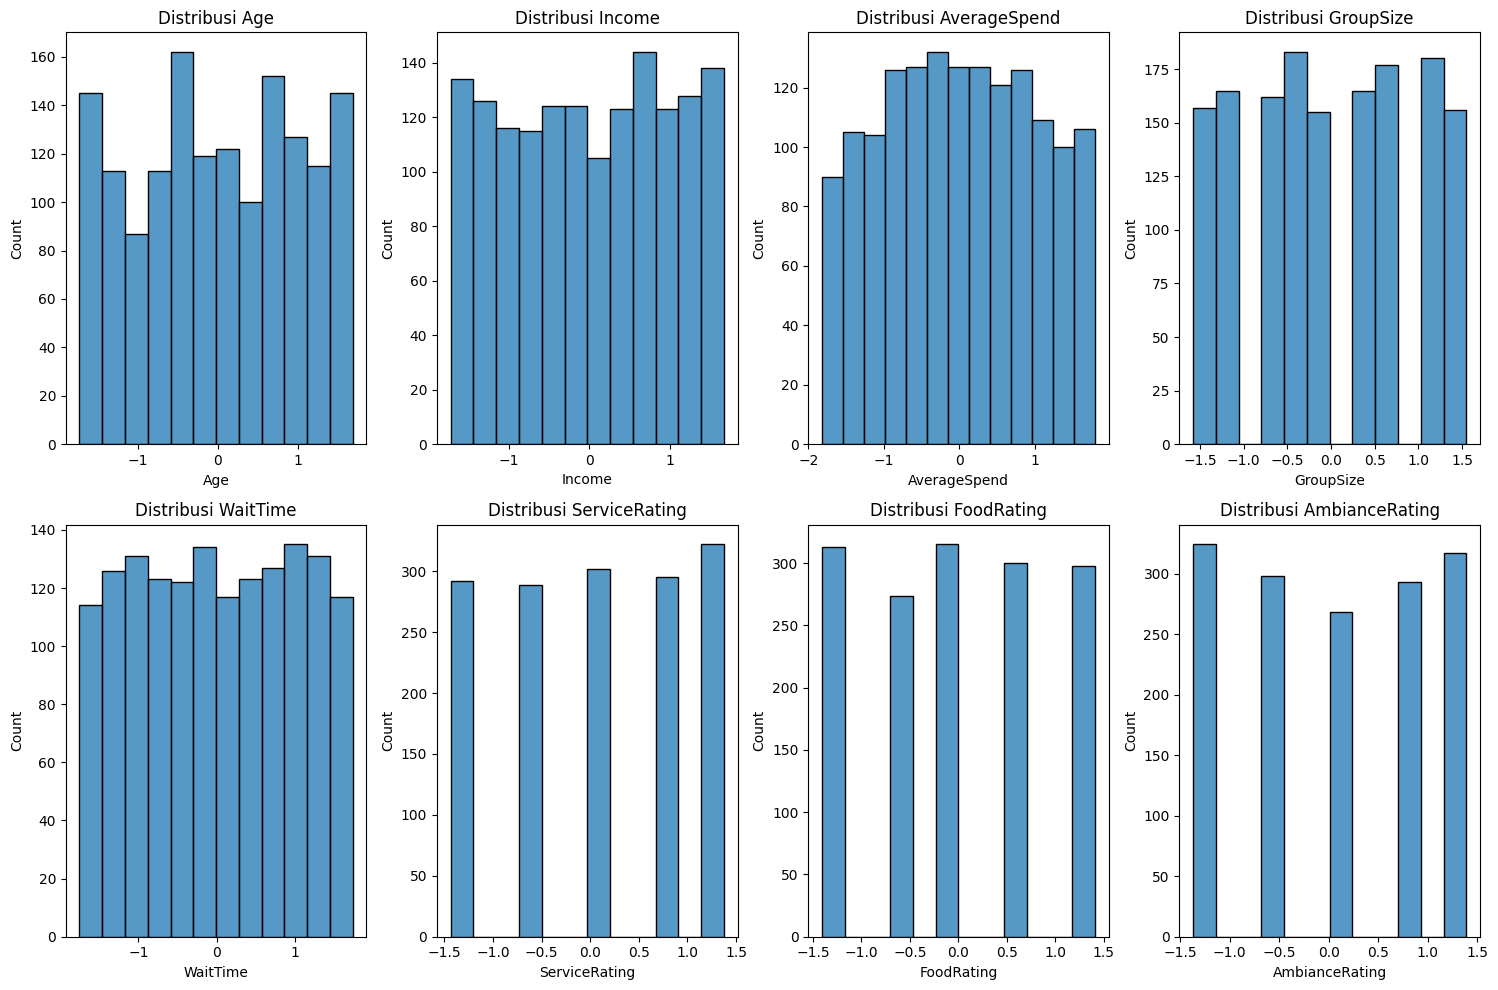

In [37]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=col)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

Korelasi antar variabel

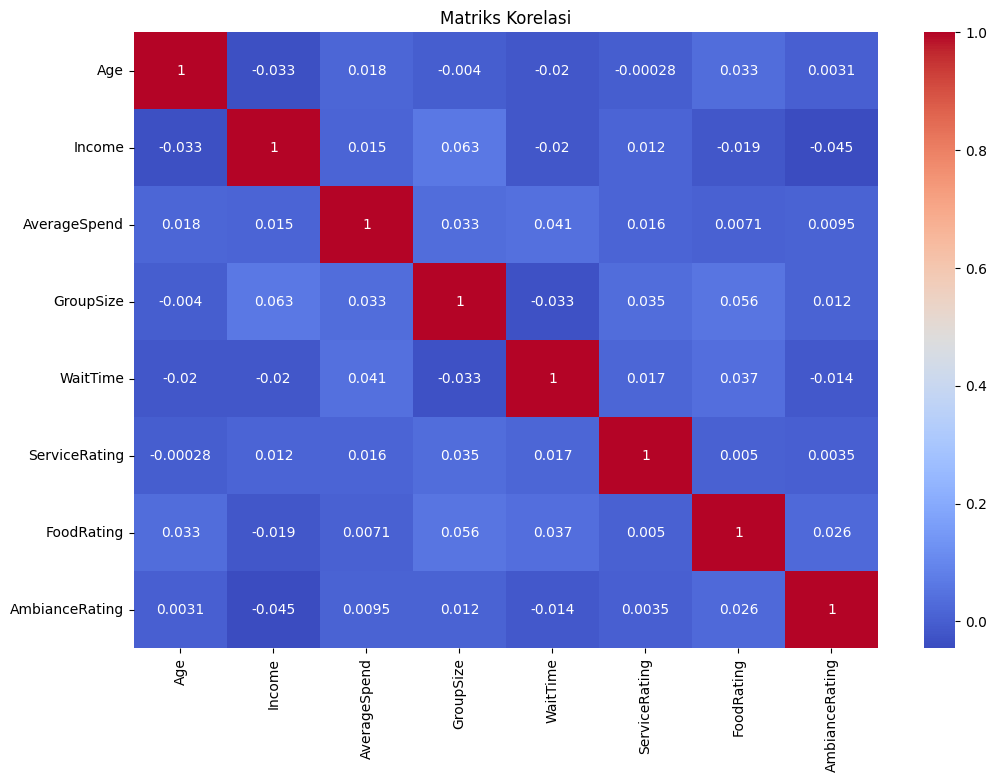

In [38]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# C.	Clustering untuk Segmentasi Pelanggan

1. Persiapkan fitur untuk clustering

In [39]:
cluster_features = ['Age', 'Income', 'AverageSpend', 'VisitFrequency', 
                   'ServiceRating', 'FoodRating', 'AmbianceRating']
X_cluster = df[cluster_features]

2. Mentukan jumlah cluster optimal dengan elbow method

In [40]:
inertias = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))


3. Plot elbow method



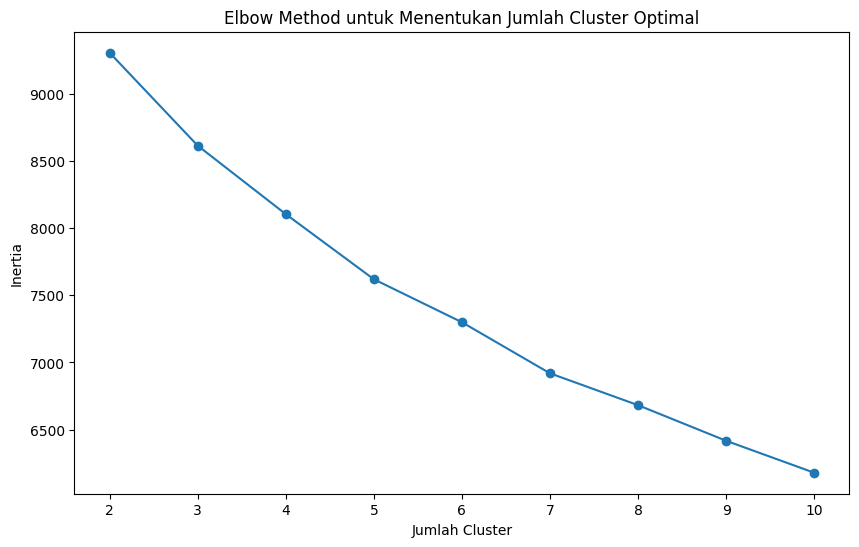

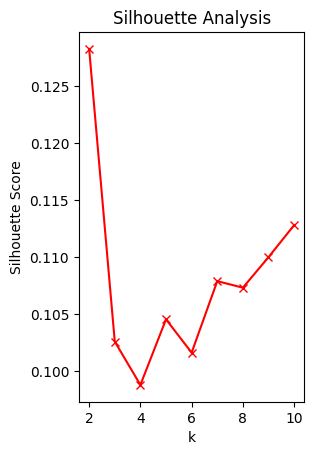

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='o', label='Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# D.	Klasifikasi untuk Memprediksi Perilaku Pembelian

 Data untuk klasifikasi

In [43]:
#1. Persiapkan data untuk klasifikasi
X = df.drop(['CustomerID', 'HighSatisfaction'], axis=1)
y = df['HighSatisfaction']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Prediksi dan evaluasi
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")


Akurasi model: 0.87


Fitur yang paling berpengaruh

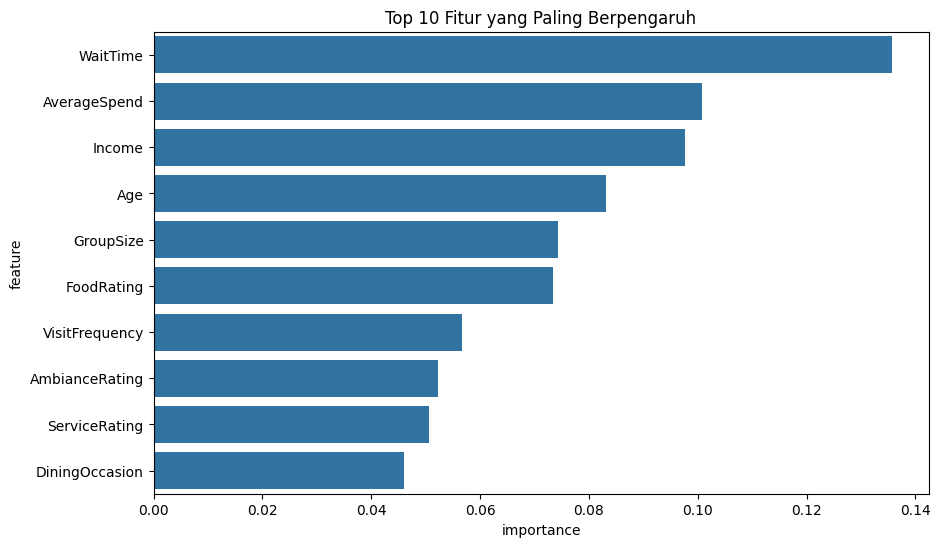

In [45]:
# 5. fitur importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Fitur yang Paling Berpengaruh')
plt.show()

# E.	Evaluasi Model dan Interpretasi Hasil





 1. Evaluasi detail untuk model klasifikasi

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       259
           1       0.80      0.10      0.17        41

    accuracy                           0.87       300
   macro avg       0.84      0.55      0.55       300
weighted avg       0.86      0.87      0.83       300



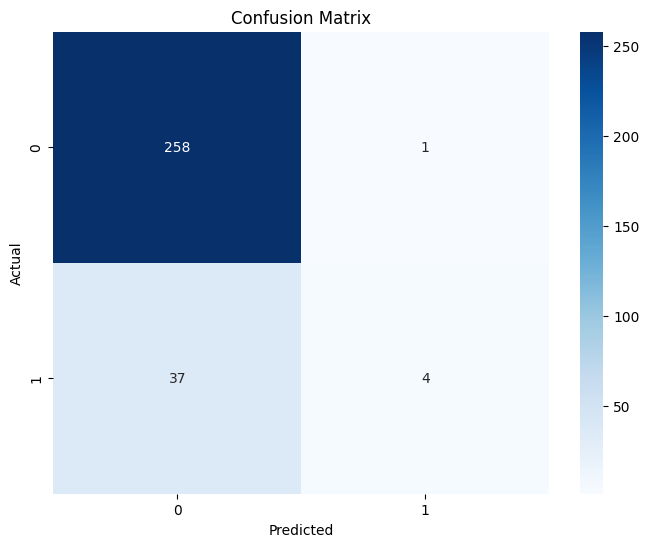

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Buat classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


 2. Evaluasi hasil clustering


Karakteristik tiap cluster:
              Age    Income  AverageSpend  VisitFrequency  ServiceRating  \
Cluster                                                                    
0        0.013606 -0.148081     -0.148688        0.722846      -0.154632   
1        0.063559 -0.110106     -0.807021        2.676596       0.004964   
2       -0.074876  0.263760      0.924797        2.475806       0.161774   

         FoodRating  AmbianceRating  
Cluster                              
0         -0.068092        0.025521  
1          0.106879        0.007267  
2         -0.027969       -0.034362  


<Figure size 1200x600 with 0 Axes>

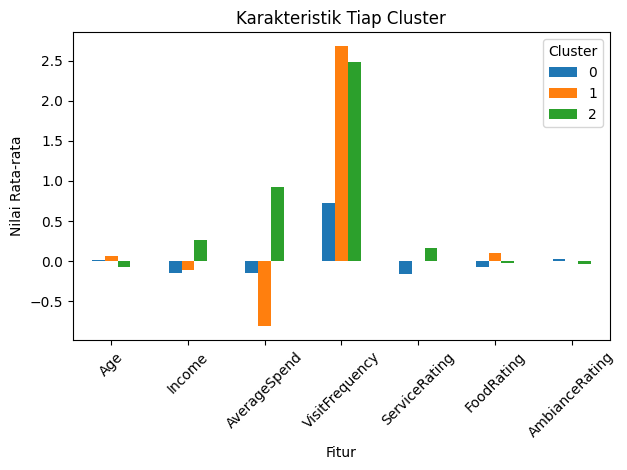

In [47]:

# A K-Means dengan jumlah cluster 
optimal_k = 3  
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_cluster)

# Tambahkan label cluster ke dataframe
df['Cluster'] = cluster_labels

# Analisis karakteristik tiap cluster
cluster_summary = df.groupby('Cluster')[cluster_features].mean()
print("\nKarakteristik tiap cluster:")
print(cluster_summary)

# Visualisasi karakteristik cluster
plt.figure(figsize=(12, 6))
cluster_summary.T.plot(kind='bar')
plt.title('Karakteristik Tiap Cluster')
plt.xlabel('Fitur')
plt.ylabel('Nilai Rata-rata')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# F.	Penyusunan Laporan dan Kesimpulan


1. Ringkasan statistik untuk setiap cluster

In [48]:
print("=== LAPORAN ANALISIS SEGMENTASI PELANGGAN ===\n")

print("1. Jumlah pelanggan per cluster:")
print(df['Cluster'].value_counts())

print("\n2. Profil cluster berdasarkan rata-rata:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    
    print("Karakteristik utama:")
    for feature in cluster_features:
        mean_val = cluster_data[feature].mean()
        print(f"- {feature}: {mean_val:.2f}")
    
    print(f"Jumlah pelanggan: {len(cluster_data)}")
    print(f"Tingkat kepuasan tinggi: {(cluster_data['HighSatisfaction'].mean()*100):.2f}%")


=== LAPORAN ANALISIS SEGMENTASI PELANGGAN ===

1. Jumlah pelanggan per cluster:
Cluster
0    534
2    496
1    470
Name: count, dtype: int64

2. Profil cluster berdasarkan rata-rata:

Cluster 0:
Karakteristik utama:
- Age: 0.01
- Income: -0.15
- AverageSpend: -0.15
- VisitFrequency: 0.72
- ServiceRating: -0.15
- FoodRating: -0.07
- AmbianceRating: 0.03
Jumlah pelanggan: 534
Tingkat kepuasan tinggi: 9.36%

Cluster 1:
Karakteristik utama:
- Age: 0.06
- Income: -0.11
- AverageSpend: -0.81
- VisitFrequency: 2.68
- ServiceRating: 0.00
- FoodRating: 0.11
- AmbianceRating: 0.01
Jumlah pelanggan: 470
Tingkat kepuasan tinggi: 15.11%

Cluster 2:
Karakteristik utama:
- Age: -0.07
- Income: 0.26
- AverageSpend: 0.92
- VisitFrequency: 2.48
- ServiceRating: 0.16
- FoodRating: -0.03
- AmbianceRating: -0.03
Jumlah pelanggan: 496
Tingkat kepuasan tinggi: 16.13%


2. Visualisasi perbandingan cluster


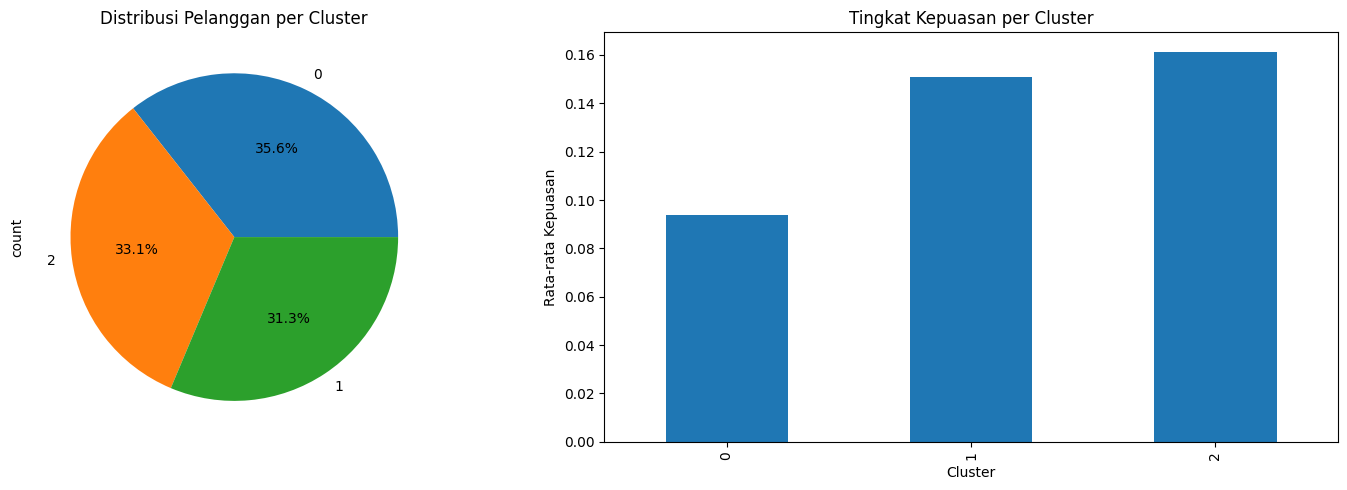


=== REKOMENDASI STRATEGI ===

1. Segmentasi Pelanggan:
   - Cluster telah mengidentifikasi 3 kelompok pelanggan berbeda
   - Setiap cluster memiliki karakteristik unik yang dapat dimanfaatkan untuk strategi pemasaran

2. Prediksi Kepuasan:
   - Model klasifikasi mencapai akurasi 87.33%
   - Faktor-faktor utama yang mempengaruhi kepuasan pelanggan telah diidentifikasi

3. Rekomendasi Tindakan:
   - Fokuskan pada peningkatan layanan untuk cluster dengan tingkat kepuasan rendah
   - Manfaatkan karakteristik cluster untuk personalisasi layanan
   - Prioritaskan perbaikan pada faktor-faktor yang memiliki pengaruh terbesar



In [55]:

plt.figure(figsize=(15, 5))

# Plot 1: Distribusi jumlah pelanggan per cluster
plt.subplot(1, 2, 1)
df['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Pelanggan per Cluster')

# Plot 2: Tingkat kepuasan per cluster
plt.subplot(1, 2, 2)
satisfaction_by_cluster = df.groupby('Cluster')['HighSatisfaction'].mean()
satisfaction_by_cluster.plot(kind='bar')
plt.title('Tingkat Kepuasan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Kepuasan')
plt.tight_layout()
plt.show()


#Rekomendasi berdasarkan analisis
print("\n=== REKOMENDASI STRATEGI ===")
print("""
1. Segmentasi Pelanggan:
   - Cluster telah mengidentifikasi {} kelompok pelanggan berbeda
   - Setiap cluster memiliki karakteristik unik yang dapat dimanfaatkan untuk strategi pemasaran

2. Prediksi Kepuasan:
   - Model klasifikasi mencapai akurasi {:.2f}%
   - Faktor-faktor utama yang mempengaruhi kepuasan pelanggan telah diidentifikasi

3. Rekomendasi Tindakan:
   - Fokuskan pada peningkatan layanan untuk cluster dengan tingkat kepuasan rendah
   - Manfaatkan karakteristik cluster untuk personalisasi layanan
   - Prioritaskan perbaikan pada faktor-faktor yang memiliki pengaruh terbesar
""".format(optimal_k, accuracy*100))